In [216]:
# Dependencies and Setup
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [217]:
# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data)
city_data.set_index('city', inplace=True)

ride_data = pd.read_csv(ride_data)
ride_data.sort_index(inplace=True)

# Combine the data into a single dataset
combined = pd.merge(ride_data, city_data, how="left", on=["city", "city"])

# Display the data table for preview
combined.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [218]:
# City Type (Urban, Suburban, Rural)
urban = combined[(combined["type"] == "Urban")]
suburban = combined[(combined["type"] == "Suburban")]
rural = combined[(combined["type"] == "Rural")]

# Average Fare ($) Per City
urban_avg_fare = urban.groupby("city").mean()["fare"]
sub_avg_fare = suburban.groupby("city").mean()["fare"]
rural_avg_fare = rural.groupby("city").mean()["fare"]

# Total Number of Rides Per City
urban_rides = urban.groupby("city").count()["ride_id"]
sub_rides = suburban.groupby("city").count()["ride_id"]
rural_rides = rural.groupby("city").count()["ride_id"]

# Total Number of Drivers Per City
urban_drivers = urban.groupby("city").sum()["driver_count"]
sub_drivers = urban.groupby("city").sum()["driver_count"]
rural_drivers = urban.groupby("city").sum()["driver_count"]


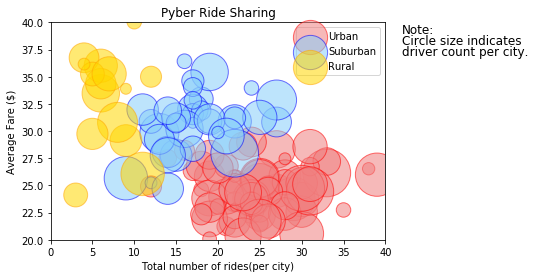

In [219]:

urban_plot=plt.scatter(urban_rides, 
                       urban_avg_fare, 
                       s=urban_drivers, 
                       c='lightcoral', alpha =.55, linewidths=1, edgecolor='red') 
                                     # alpha relates to the opaqueness/translucence

suburban_plot=plt.scatter(sub_rides, 
                          sub_avg_fare, 
                          s=sub_drivers, 
                          c="lightskyblue", alpha =.55, linewidths=1, edgecolor='blue')

rural_plot=plt.scatter(rural_rides, 
                       rural_avg_fare, 
                       s=rural_drivers, 
                       c="gold", alpha =.55, linewidths=1, edgecolor='orange')


# Incorporate the other graph properties
plt.xlim(0,40)
plt.ylim(20,40)
plt.title("Pyber Ride Sharing")
plt.xlabel("Total number of rides(per city)")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend(handles=[urban_plot,suburban_plot,rural_plot], labels=['Urban','Suburban','Rural'])

# Incorporate a text label regarding circle size
plt.text(42, 39, "Note:", fontsize=12)
plt.text(42, 38, "Circle size indicates ", fontsize=12)
plt.text(42, 37, "driver count per city.", fontsize=12)

# Save Figure
plt.savefig('pyber_bubbleplot.pdf')
# Show plot
plt.show()

## Total Fares by City Type

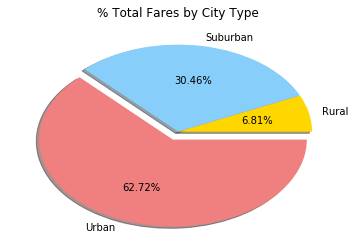

In [220]:
# Calculate Type Percents
    # % of Total Fares by City Type
total_urban_fare = urban["fare"].sum()
total_sub_fare = suburban["fare"].sum()
total_rural_fare = rural["fare"].sum()

total_fare = combined["fare"].sum()

percent_urban_fare = total_urban_fare/total_fare
percent_sub_fare = total_sub_fare/total_fare
percent_rural_fare = total_rural_fare/total_fare

out_fare = [percent_rural_fare, percent_sub_fare, percent_urban_fare]

# Build Pie Chart
explode = (0, 0, 0.1)
labels=("Rural", "Suburban", "Urban")
colors=("gold", "lightskyblue", "lightcoral")
plt.pie(out_fare,labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, explode=explode)
plt.title("% Total Fares by City Type")

# Save Figure
plt.savefig('pyber_fares_bycitytype.pdf')

# Show Figure
plt.show()

## Total Rides by City Type

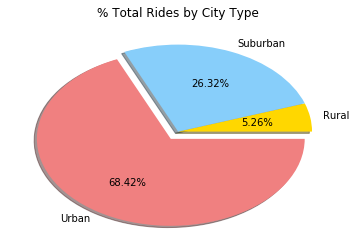

In [221]:
# Calculate Ride Percents
    # % of Total Rides by City Type
total_urban_rides = urban["ride_id"].count()
total_sub_rides = suburban["ride_id"].count()
total_rural_rides = rural["ride_id"].count()

total_rides = combined["ride_id"].count()

percent_urban_rides = total_urban_rides/total_rides
percent_sub_rides = total_sub_rides/total_rides
percent_rural_rides = total_rural_rides/total_rides

out_rides = [percent_rural_rides, percent_sub_rides, percent_urban_rides]

# Build Pie Chart
explode = (0, 0, 0.1)
labels=("Rural", "Suburban", "Urban")
colors=("gold", "lightskyblue", "lightcoral")
plt.pie(out_rides,labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, explode=explode)
plt.title("% Total Rides by City Type")

# Save Figure
plt.savefig('pyber_rides_bycitytype.pdf')

# Show Figure
plt.show()

## Total Drivers by City Type

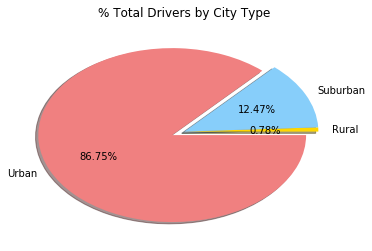

In [222]:
# Calculate Driver Percents
    # % of Total Drivers by City Type

total_urban_drivers = urban["driver_count"].sum()
total_sub_drivers = suburban["driver_count"].sum()
total_rural_drivers = rural["driver_count"].sum()

total_drivers = combined["driver_count"].sum()

percent_urban_drivers = total_urban_drivers/total_drivers
percent_sub_drivers = total_sub_drivers/total_drivers
percent_rural_drivers = total_rural_drivers/total_drivers

out_drivers = [percent_rural_drivers, percent_sub_drivers, percent_urban_drivers]

# Build Pie Chart
explode = (0, 0, 0.1)
labels=("Rural", "Suburban", "Urban")
colors=("gold", "lightskyblue", "lightcoral")
plt.pie(out_drivers,labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, explode=explode)
plt.title("% Total Drivers by City Type")

# Save Figure
plt.savefig('pyber_drivers_bycitytype.pdf')

# Show Figure
plt.show()